# **Association Rule Learning: Apriori & Eclat in R**

## **Apriori**

### **Data Preprocessing**

In [1]:
install.packages('arules')
library(arules)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




In [2]:
ds = read.csv('/content/Market_Basket_Optimisation.csv', header = FALSE)
head(ds)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
2,burgers,meatballs,eggs,,,,,,,,,,,,,,,,,
3,chutney,,,,,,,,,,,,,,,,,,,
4,turkey,avocado,,,,,,,,,,,,,,,,,,
5,mineral water,milk,energy bar,whole wheat rice,green tea,,,,,,,,,,,,,,,
6,low fat yogurt,,,,,,,,,,,,,,,,,,,


In [3]:
ds = read.transactions('/content/Market_Basket_Optimisation.csv', sep = ',', rm.duplicates = TRUE)
summary(ds)

distribution of transactions with duplicates:
1 
5 


transactions as itemMatrix in sparse format with
 7501 rows (elements/itemsets/transactions) and
 119 columns (items) and a density of 0.03288973 

most frequent items:
mineral water          eggs     spaghetti  french fries     chocolate 
         1788          1348          1306          1282          1229 
      (Other) 
        22405 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
1754 1358 1044  816  667  493  391  324  259  139  102   67   40   22   17    4 
  18   19   20 
   1    2    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   3.914   5.000  20.000 

includes extended item information - examples:
             labels
1           almonds
2 antioxydant juice
3         asparagus

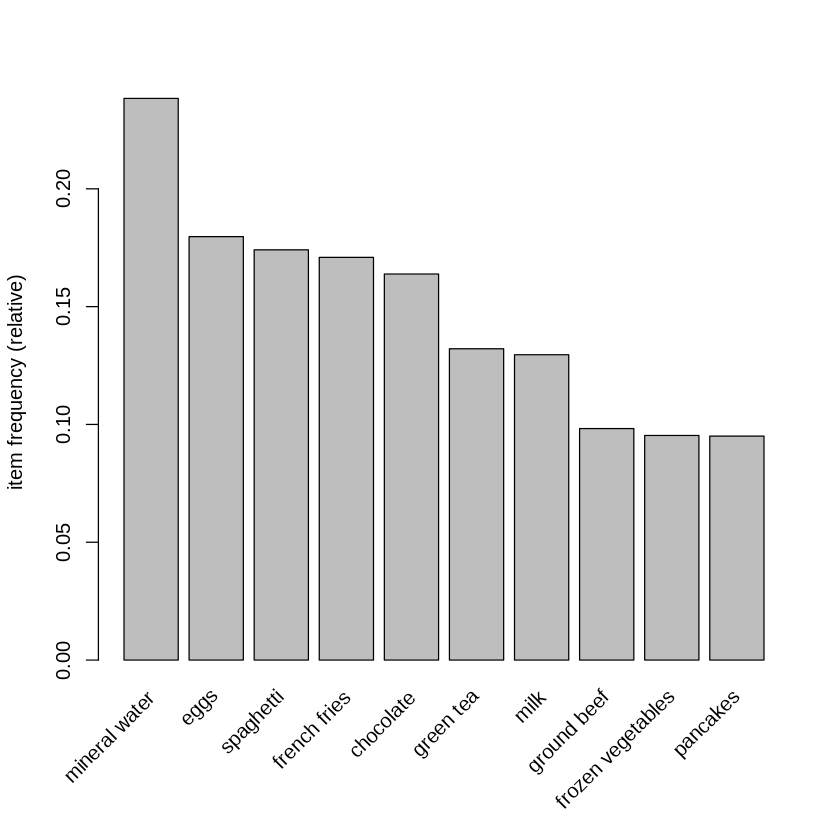

In [4]:
itemFrequencyPlot(ds, topN = 10)

### **Training Apriori on the dataset**

In [5]:
rules = apriori(data = ds, parameter = list(support = 0.004, confidence = 0.2))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.2    0.1    1 none FALSE            TRUE       5   0.004      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 30 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [114 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [811 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


### **Visualizing the results**

In [6]:
inspect(sort(rules, by = 'lift')[1:10])

     lhs                       rhs                 support confidence   coverage     lift count
[1]  {light cream}          => {chicken}       0.004532729  0.2905983 0.01559792 4.843951    34
[2]  {pasta}                => {escalope}      0.005865885  0.3728814 0.01573124 4.700812    44
[3]  {pasta}                => {shrimp}        0.005065991  0.3220339 0.01573124 4.506672    38
[4]  {eggs,                                                                                    
      ground beef}          => {herb & pepper} 0.004132782  0.2066667 0.01999733 4.178455    31
[5]  {whole wheat pasta}    => {olive oil}     0.007998933  0.2714932 0.02946274 4.122410    60
[6]  {herb & pepper,                                                                           
      spaghetti}            => {ground beef}   0.006399147  0.3934426 0.01626450 4.004360    48
[7]  {herb & pepper,                                                                           
      mineral water}        => {ground b

## **Eclat**

### **Training Eclat on the dataset**

In [7]:
rules = eclat(data = ds, parameter = list(support = 0.003, minlen = 2))

Eclat

parameter specification:
 tidLists support minlen maxlen            target  ext
    FALSE   0.003      2     10 frequent itemsets TRUE

algorithmic control:
 sparse sort verbose
      7   -2    TRUE

Absolute minimum support count: 22 

create itemset ... 
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [115 item(s)] done [0.00s].
creating sparse bit matrix ... [115 row(s), 7501 column(s)] done [0.00s].
writing  ... [1328 set(s)] done [0.01s].
Creating S4 object  ... done [0.00s].


### **Visualizing the results**

In [8]:
inspect(sort(rules, by = 'support')[1:10])

     items                              support    count
[1]  {mineral water, spaghetti}         0.05972537 448  
[2]  {chocolate, mineral water}         0.05265965 395  
[3]  {eggs, mineral water}              0.05092654 382  
[4]  {milk, mineral water}              0.04799360 360  
[5]  {ground beef, mineral water}       0.04092788 307  
[6]  {ground beef, spaghetti}           0.03919477 294  
[7]  {chocolate, spaghetti}             0.03919477 294  
[8]  {eggs, spaghetti}                  0.03652846 274  
[9]  {eggs, french fries}               0.03639515 273  
[10] {frozen vegetables, mineral water} 0.03572857 268  
